# Longest Tiny Loop
Some time ago Dan Aminzade came up with a nice fitness challenge called [Long Tiny Loop](https://longtinyloop.com/) (LTL), which is _to traverse the longest possible non-self-intersecting loop within the smallest possible region, without revisiting any streets or intersections_. For a given _Strava_ activity it counts a score which is based on ration between total distance and diameter of the route, more specifically:

>Your score is the ratio of the total distance you traveled to the diameter of the region within which you traveled. To increase your score, try going farther within a smaller area. [1]

After solving [Every Street challenge](http://www.everystreetchallenge.com/) and running [Space Filling Curves](https://matejker.github.io/run-hilbert-run/) on a regular street grid, I wondered how we distinguish the longest possible Tiny Loop for any given area..

## Finding elementary network's cycles
Based on the LTL rules, we want to find a closed path which doesn't intersect itself, which is by definition a network cycle [2]. Ultimately we would be interested in a cycle which is the longest among all cycles in the network. Therefore, we would consider a weighted network where the _weight_ is the physical length of the edge - street.

There are plenty of algorithms finding all network's cycles [3], one of the more optimal one is the Donald Johnson's algorithm described in _Finding all the elementary circuits of a directed graph_ [4] which time complexity is $O((n + e)(c + 1))$.
Once we find all the elementary cycles, we loop through all of them and find the one with the longest total distance.

In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

from libs.tools import CUSTOM_FILTER, get_route_length, get_longest_route, plot_graph_route

import warnings
warnings.filterwarnings("ignore")

Johnson's algorithm works only for directed networks, while runner / cyclist can run / cycle both directions. Firstly, we need to turn the original graph into an undirected graph, so all edges are both ways. Next, we need to turn it back to directed, so the algorithm may be applied on the network.

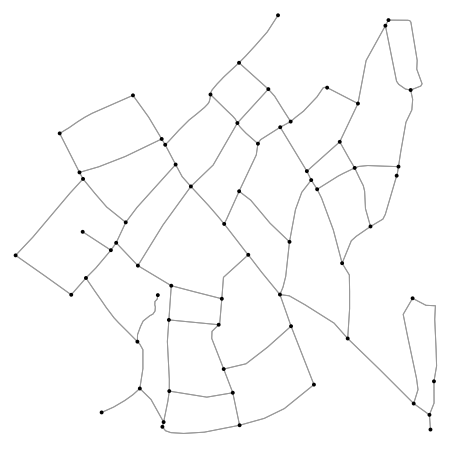

In [2]:
center = (43.86560108562077, 18.42214681086677)  # Somewhere in Sarajevo
dist = 300
org_graph = ox.graph_from_point(center, dist, custom_filter=CUSTOM_FILTER)
undirected_graph = ox.utils_graph.get_undirected(org_graph)
graph = undirected_graph.to_directed()
fig, ax = ox.plot_graph(graph, node_zorder=2, node_color="k", bgcolor="w")

In [3]:
cycles = nx.simple_cycles(graph)
route, length = get_longest_route(graph, cycles)
print(f"Total distance {round(length, 2)} km")

Total distance 3.93 km


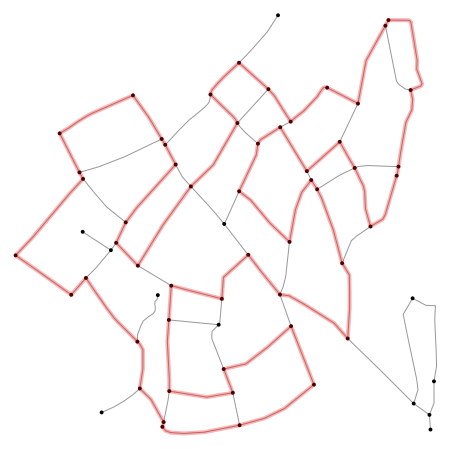

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [4]:
plot_graph_route(undirected_graph, route, bgcolor="w", node_color="k", route_alpha=0.3)

## References
[1] Aminzade D., (202?), _Long Tiny Loop_, https://longtinyloop.com/   
[2] Diestel. R, (2005), _Graph Theory Graduate Texts in Mathematics_, Springer  
[3] Mateti, Prabhaker & Deo, N.. (1976). _On Algorithms for Enumerating All Circuits of a Graph._ SIAM J. Comput.. 5. 90-99. 10.1137/0205007.  
[4] Johnson D. B. (1975), _Finding All the Elementary Circuits of a Directed Graph_, https://doi.org/10.1137/0204007  